In [1]:
import torch
import matplotlib.pyplot as plt

In [2]:
# basic generators!!!

def generate_multivariate_normal(size):
    mean = torch.tensor([1.0, 2.0])
    cov = torch.tensor([[2.0, 0.5], [0.5, 1.0]])
    A = torch.linalg.cholesky(cov)
    z = torch.randn(*size, 2)
    samples = mean + z @ A.T
    return samples

def generate_normal(size):
    return torch.normal(mean=0, std=1e-7, size=size)

def generate_unif(size):
    return torch.rand(size=size)

def generate_Cauchy(size):
    cauchy = torch.distributions.Cauchy(loc=0.0, scale=100.0)
    tensor = cauchy.sample(size)
    return tensor

def generate_dirichlet(size):
    alpha = torch.tensor([0.5, 0.5, 0.5])
    dirichlet = torch.distributions.Dirichlet(alpha)
    tensor = dirichlet.sample(size)
    return tensor

def generate_Beta(size):
    beta = torch.distributions.Beta(concentration0=0.5, concentration1=0.5)
    tensor = beta.sample(size)
    return tensor

def generate_poisson(size):
    rates = torch.full(size, 4.0)
    tensor = torch.poisson(rates)
    return tensor

def generate_LogNormal(size):
    lognormal = torch.distributions.LogNormal(loc=0.0, scale=1.0)
    tensor = lognormal.sample(size)
    return tensor


def generate_Gamma(size):
    gamma = torch.distributions.Gamma(concentration=2.0, rate=2.0)
    tensor = gamma.sample(size)
    return tensor


def generate_Exponential(size):
    exponential = torch.distributions.Exponential(rate=1.0)
    tensor = exponential.sample(size)
    return tensor


list_distr = {
    generate_multivariate_normal: 'DNormal',
    generate_normal: 'Normal',
    generate_unif: 'Unif',
    generate_Cauchy: 'Cauchy',
    generate_dirichlet: 'Dirichlet',
    generate_Beta: 'Beta',
    generate_poisson: 'Poisson',
    generate_LogNormal: 'LogNormal',
    generate_Gamma: 'Gamma',
    generate_Exponential: 'Exponential'
}

In [3]:
def plot_hist(tensor, name):
    input_np = tensor.numpy().flatten()
    plt.figure(figsize=(10, 6))
    plt.hist(input_np, bins=100, color='blue', alpha=0.7, edgecolor='black')
    plt.title(name)
    plt.xlabel("Value")
    plt.ylabel("Frequency")
    plt.grid(True)
    plt.show()

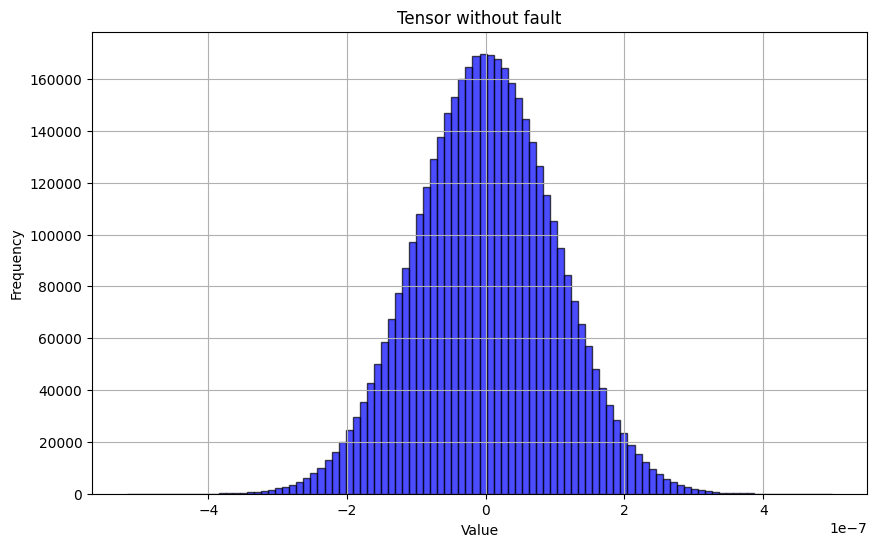

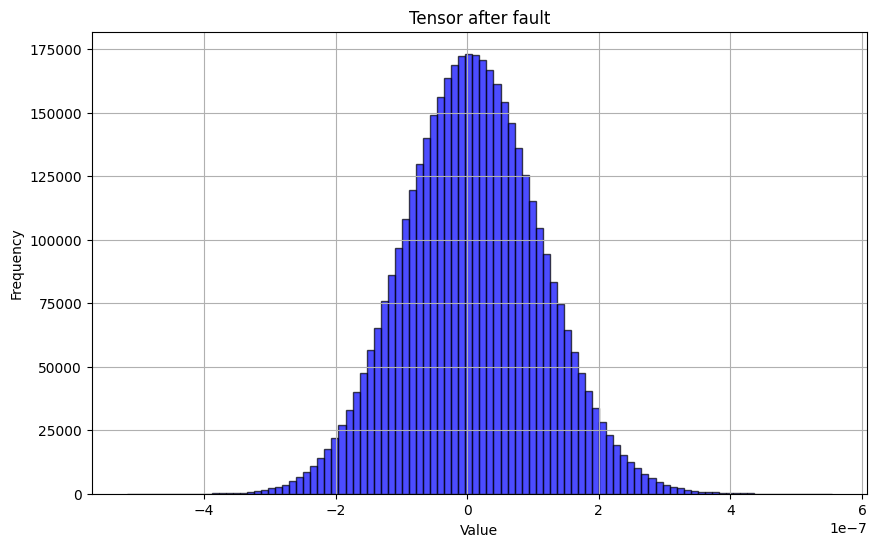

In [18]:
def make_fault(input, numFaults, fault_value):
    output = input.clone()
    for _ in range(numFaults):
        x, y = torch.randint(0, input.shape[0], size=(1,)).item(), torch.randint(0, input.shape[0], size=(1,)).item()
        output[x,y] = torch.normal(mean=fault_value, std=1e-7, size=(1,)).item()
        # input[x,y] = fault_value
    return output

size = (1024, 4096)
rate = 0.1
fault_value = 1e-7
numFaults = int(size[0] * size[1] * rate)
input_no_fault = generate_normal(size)
plot_hist(input_no_fault, "Tensor without fault")
input_fault = make_fault(input_no_fault, numFaults, fault_value)
plot_hist(input_fault, "Tensor after fault")

In [19]:

import numpy as np

def detect_outliers(tensor, k=1.5):
    mean, std = torch.mean(tensor), torch.std(tensor)
    tensor = (tensor - mean) / std
    Q1, Q3 = torch.quantile(tensor, 0.25), torch.quantile(tensor, 0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - k * IQR
    upper_bound = Q3 + k * IQR
    min, max = torch.min(tensor), torch.max(tensor)
    print('min_max = ({}, {}), boundaries = ({}, {})'.format(min, max, lower_bound, upper_bound))
    fault = min < lower_bound or max > upper_bound
    return fault


fault = input_fault.clone()
outliers = detect_outliers(fault)
if outliers:
    print('[Fault detected]')
else:
    print('No fault detected')

min_max = (-5.063046932220459, 5.260904788970947), boundaries = (-2.692504405975342, 2.681039571762085)
[Fault detected]
